In [75]:
import pandas as pd
import numpy as np
from datetime import datetime
from TradingDataFrame import TradingDataFrame
from strategy import Strategy
import calendar
from matplotlib import pyplot as plt
import seaborn as sn
import pickle

In [76]:
# Binance packages

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
from binance.exceptions import BinanceAPIException

stuffs = ''
api_key = ''
api_secret = ''

client = Client(api_key, api_secret)
prices = pd.DataFrame(client.get_all_tickers())

today_date = str(datetime.today().day+1) + ' ' + calendar.month_abbr[datetime.today().month] + ' ' + str(datetime.today().year)

# Extract BTCUSDT data

klines = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1HOUR, '16 Jan 2021', today_date)
klines_cols = [
    'Open Time',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Close time',
    'Quote asset volume',
    'Number of trades',
    'Taker buy base asset volume',
    'Taker buy quote asset volume',
    'Ignore']

# Setup df

df = pd.DataFrame(klines, columns=klines_cols)
df.drop_duplicates(inplace=True)

price_criteria_pair = {
    'Open': 'Number of trades',
    'Close': 'Number of trades'
}

tdf = TradingDataFrame(df, time_col='Open Time', price_criteria_pair=price_criteria_pair, source='binance')

In [77]:
tdf.data

,Open,Close,Number of trades,Open_pct_change,Close_pct_change
Open Time,,,,,
2021-01-16 01:00:00,37159.51,37005.86,86508,0.011489,-0.004135
2021-01-16 02:00:00,37003.76,36224.51,91436,-0.004191,-0.021114
2021-01-16 03:00:00,36224.51,36532.92,72075,-0.021059,0.008514
2021-01-16 04:00:00,36532.92,36574.54,51540,0.008514,0.001139
2021-01-16 05:00:00,36575.37,35854.37,81056,0.001162,-0.019690
...,...,...,...,...,...
2023-02-22 12:00:00,24160.87,24129.68,403879,-0.000889,-0.001291
2023-02-22 13:00:00,24130.67,24109.71,482983,-0.001250,-0.000828
2023-02-22 14:00:00,24110.80,23939.75,646572,-0.000823,-0.007049


Strategy applied!
# of trades: 210
Sharpe ratio: 0.38
Max Drawdown: 1.2602632987855804


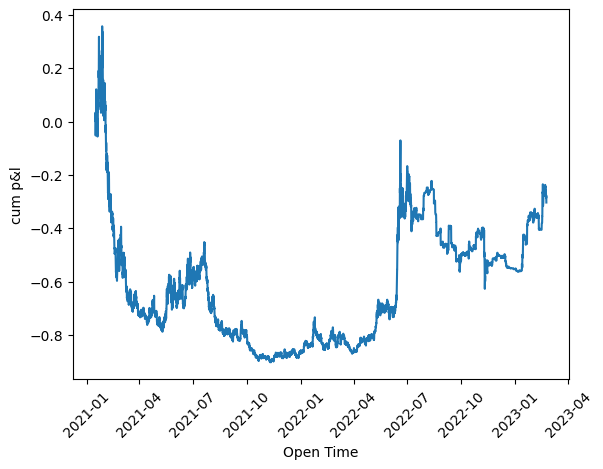

In [78]:
nlp = Strategy('testing')
nlp.set_strategy(
    long_entry=['>',400000],
    long_exit=['<',300000],
    short_entry=['<',100000],
    short_exit=['>',200000]
)
nlp.apply_strategy(tdf)
nlp.backtest(tdf)

In [79]:
nlp.save()

Saved as "testing"!
